In [12]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf

In [13]:
!pip install seaborn


  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl (13.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Rolling back uninstall of numpy
  Moving to c:\users\tecap\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\
   from C:\Users\tecap\anaconda3\Lib\site-packages\~umpy-1.24.3.dist-info
  Moving to c:\users\tecap\anaconda3\lib\site-packages\numpy\__config__.py
   from C:\Users\tecap\AppData\Local\Temp\pip-uninstall-hkgvmsif\__config__.py
  Moving to c:\users\tecap\anaconda3\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\tecap\AppData\Local\Temp\pip-uninstall-hkgvmsif\__init__.cython-30.pxd
  Moving to c:\users\tecap\anaconda3\lib\site-packages\numpy\__init__.pxd
   from C:\Users\tecap\AppData\Local\Temp\pip-uninstall-hkgvmsif\__init__.pxd
  Moving to c:\users\tecap\anaconda3\lib\site-package

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\tecap\\anaconda3\\Lib\\site-packages\\numpy\\_core\\_multiarray_umath.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
base_path = os.path.expanduser('~/Downloads/archive (1)/flowers/flowers/Orange')  # <== AJUSTE

In [19]:
!{sys.executable} -m pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [6]:
# ================================================
# 1. IMPORTS E CAMINHO BASE
# ================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [12]:
# ================================================
# 2. CRIAR DATAFRAME df_all
# ================================================
rows = []
for dirname, _, filenames in os.walk(base_path):
    jpgs = [f for f in filenames if f.lower().endswith('.jpg')]
    if not jpgs:
        continue
    folder_name = os.path.basename(dirname)  # nome da classe
    for f in jpgs:
        rows.append({"path": os.path.join(dirname, f), "label": folder_name})

df_all = pd.DataFrame(rows)
print("Resumo por classe (original):\n", df_all['label'].value_counts().sort_index())

# Lista de classes
classes = sorted(df_all['label'].unique().tolist())


Resumo por classe (original):
 label
Formalin-mixed    5176
Fresh             6024
Rotten            5248
Name: count, dtype: int64


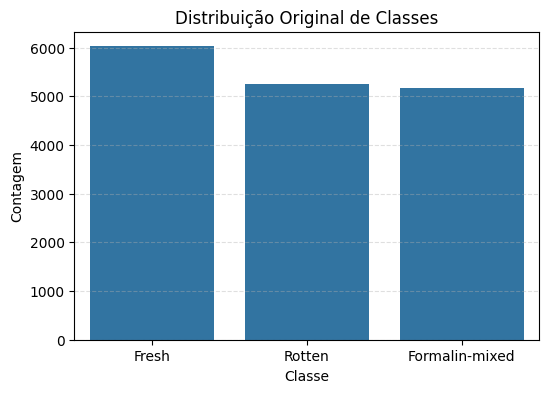

In [14]:
# ================================================
# 3. DISTRIBUIÇÃO ORIGINAL DE CLASSES
# ================================================
plt.figure(figsize=(6,4))
order_all = df_all['label'].value_counts().index
sns.countplot(data=df_all, x='label', order=order_all)
plt.title('Distribuição Original de Classes')
plt.xlabel('Classe'); plt.ylabel('Contagem')
plt.grid(axis='y', ls='--', alpha=0.4)
plt.show()


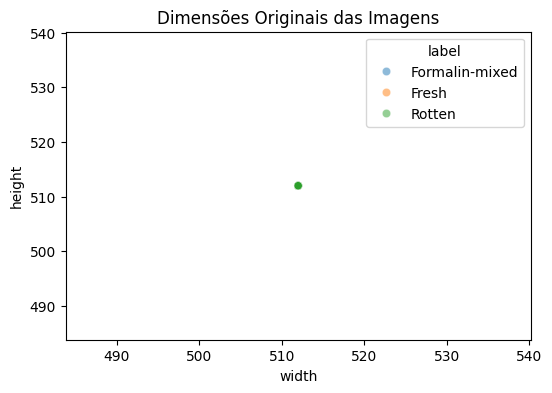


Estatísticas de dimensões:
         width   height
count  16448.0  16448.0
mean     512.0    512.0
std        0.0      0.0
min      512.0    512.0
25%      512.0    512.0
50%      512.0    512.0
75%      512.0    512.0
max      512.0    512.0


In [16]:
# ================================================
# 4. DIMENSÕES ORIGINAIS DAS IMAGENS
# ================================================
df_all['width'] = df_all['path'].apply(lambda p: Image.open(p).size[0])
df_all['height'] = df_all['path'].apply(lambda p: Image.open(p).size[1])

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_all, x='width', y='height', hue='label', alpha=0.5)
plt.title('Dimensões Originais das Imagens')
plt.show()

# Estatísticas das dimensões
print("\nEstatísticas de dimensões:")
print(df_all[['width', 'height']].describe())

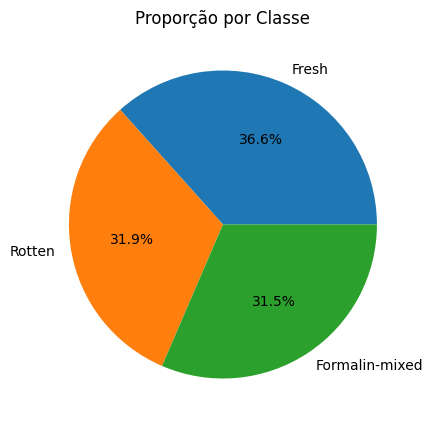

In [20]:
# ================================================
# 5. PROPORÇÃO POR CLASSE (PIE CHART)
# ================================================
df_all['label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title('Proporção por Classe')
plt.ylabel('')
plt.show()

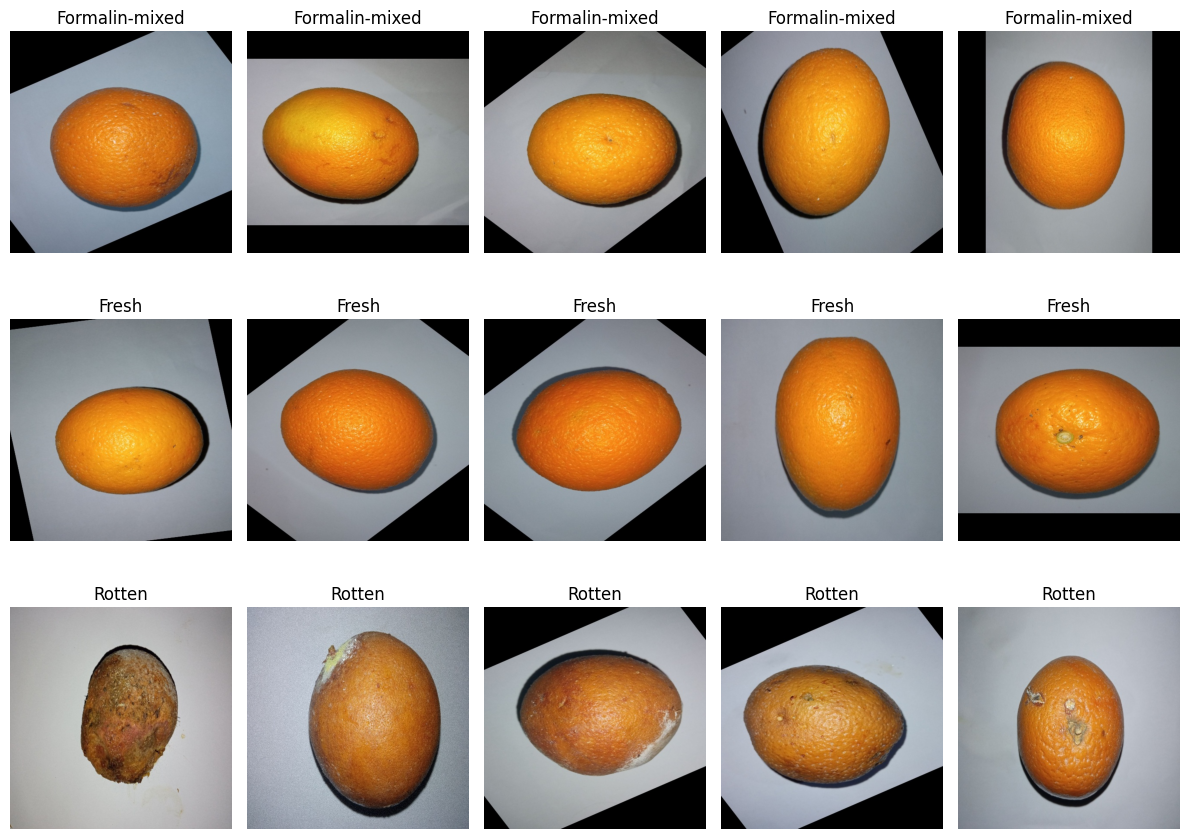

In [22]:
# ================================================
# 6. AMOSTRAS VISUAIS POR CLASSE
# ================================================
fig, axes = plt.subplots(len(classes), 5, figsize=(12, 3*len(classes)))
if len(classes) == 1:
    axes = [axes]  # se só tiver uma classe

for ax_row, label in zip(axes, classes):
    samples = df_all[df_all['label'] == label].sample(5, random_state=0)
    for ax, (_, row) in zip(ax_row, samples.iterrows()):
        img = Image.open(row['path'])
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)

plt.tight_layout()
plt.show()

In [24]:
# ================================================
# 7. RESUMO FINAL
# ================================================
print(f"\nNúmero total de imagens: {len(df_all)}")
print(f"Número de classes: {len(classes)}")


Número total de imagens: 16448
Número de classes: 3
